## 2) ALTERNATIVE MODEL - HYPER PARAMETER TUNING

 The baseline model was overfitting the data and had a large generalization error. In order to address this issue, some tweaks were made to the baseline model to improve its performance. They following hyper parameters are tuned-
 
 1) Adding L2 Regularization
 
 2) Adding Batch Normalization
 
 3) Adding 40% Dropout

In [4]:
from tensorflow.keras import regularizers

# 1) Adding L2 Regularization
# 2) Adding Batch Normalization
# 3) Adding 40% Dropout

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01), 
                 activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization(name='batchnorm_1'))

model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(BatchNormalization(name='batchnorm_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [5]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

### Model compilation

In [6]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model.summary()
history1 = model.fit_generator(
        training_generator,
        steps_per_epoch=100, 
        epochs=75,                
        validation_data=validation_generator,
        callbacks=callbacks,        
        validation_steps=num_val // batch_size)       



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 44, 44, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

### Tuned Model - Metric Visualization

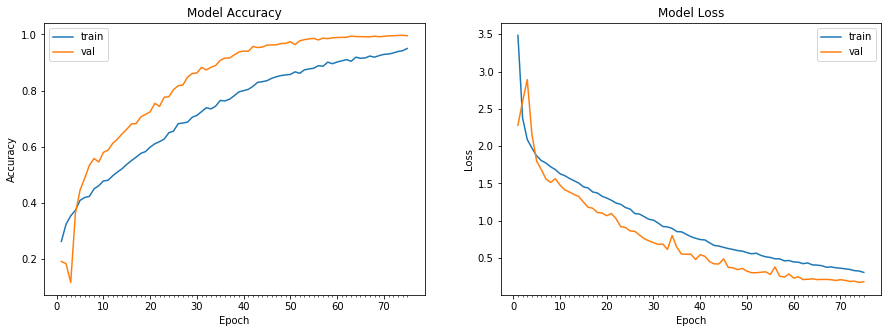

In [7]:
plot_model_history(history1)
    
model.save("model_train_final.h5")

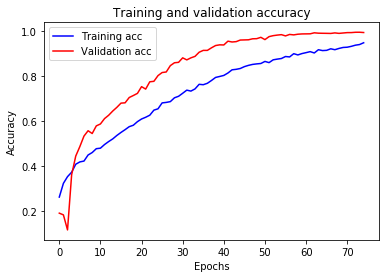

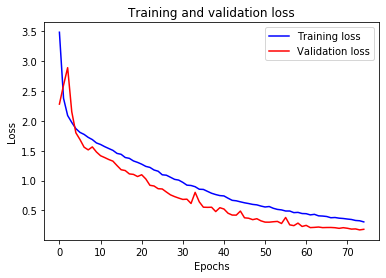

In [8]:
# Plot

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Max Accuracy

print("Validation Accuracy:", max(history1.history['val_accuracy']))
print("Training Accuracy", max(history1.history['accuracy']))

Validation Accuracy: 0.9966517686843872
Training Accuracy 0.9498437643051147


In [10]:
# Predicions and Evaluate
pred = model.predict_generator(validation_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [11]:
predictions  = []
for each in range(len(pred)):
  predictions.append(np.argmax(pred[each]))
len(predictions)

28709

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14      3995
           1       0.01      0.01      0.01       436
           2       0.15      0.15      0.15      4097
           3       0.25      0.25      0.25      7215
           4       0.18      0.17      0.17      4965
           5       0.16      0.16      0.16      4830
           6       0.11      0.11      0.11      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



### Confusion Matrix - Tuned Model

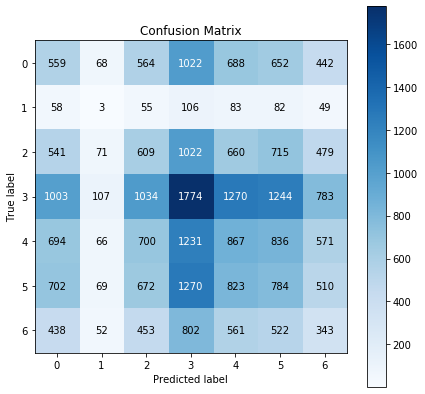

In [13]:
import scikitplot
import seaborn as sns
from matplotlib import pyplot
scikitplot.metrics.plot_confusion_matrix((validation_generator.classes), predictions, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn2.png")

The confusion matrix shows the comparison between model prediction and actual prediction. The tuned model performs much better than the baseline model for all the classes

### Implementation:

#### A Real-time Emotion Detection is built using deep CNN and implemented using XML haar cascade and open source computer visualization, OpenCV. The model detects the face and assigns SoftMax scores. The emotion with the highest SoftMax score is displayed as the emotion of the face

#### Two models are built, the Baseline model using simple 2D CNN layers and the Tuned model using L2 regularization, Batch Normalization and Dropout. 

Baseline Model -> Generalization Error, Overfitting, Training Accuracy - 95.5%, Validation Accuracy - 63.37%

Tuned Model -> No Generalization Error or Overfitting, Training Accuracy - 94.98%, Validation Accuracy - 99.66%